In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

In [2]:
# Função delta

def d(n,m):
  if n == m:
    return 1
  else:
    return 0

# **Estado Inicial**

Para o estudo de correlação e entropia o estado inicial vai ser dado por:

\begin{equation*}
    \psi_0 = \ket{M,P,0,0}
\end{equation*}

Com M = 4 e P = 11, onde o total de partículas no sistema vai ser dado por N = M+P. A dimensão do meu espaço vetorial vai ser dado por.

\begin{equation*}
    dim = \frac{(N+3)(N+2)(N+1)}{6}
\end{equation*}

In [45]:
# Estado Inicial:

M = 4
P = 11
N = M + P

dim = int((N+3)*(N+2)*(N+1)/6)

aux, l = 0, 0

for n1 in range(N+1):
    for n2 in range(N+1-n1):
        for n3 in range(N+1 - n1 - n2):
            n4 = N - n1 - n2 - n3
            if (n1==0 and n2==0 and n3==M and n4==P):   #00MP
                aux = l
            l += 1

MP00 = np.zeros((dim,1))
MP00[aux,0] = 1.0



# **Hamiltoniano**

O  modelo generalizado do Hamiltoniano para um sistema bipartidário é.

\begin{equation*}
    H = -U(N_A - N_B)^2 + \frac{J}{2}\sum_i^n\sum_j^m (a^{\dagger}_ib_j + a_ib^{\dagger}_j)
\end{equation*}

Para o nosso caso de 4 poços podemos escrever da seguinte forma.

\begin{equation*}
    H =  -U(N_1 + N_3 - N_2 - N_4)^2 + \frac{J}{2}[(a_1^{\dagger} + a_3^{\dagger})(a_2 + a_4) + (a_1 + a_3)(a_2^{\dagger} + a_4^{\dagger})]    
\end{equation*}

Para este estudo vamos adotar $\hbar = 1$ isto leva a $U/\hbar = 2\pi 19.5 Hz$, $J/\hbar = 2\pi16.2 Hz$.

In [46]:
# Hamiltoniano:

U = 2*np.pi*19.5
J = 2*np.pi*16.2

Hint = np.zeros((dim,dim))
Htun = np.zeros((dim,dim))

l, c = 0, 0

for n1 in range(N+1):
    for n2 in range(N+1 - n1):
        for n3 in range(N+1 -n1 - n2):
            n4 = N - n1 - n2 - n3
            l = 0
            for m1 in range(N+1):
                for m2 in range(N+1 - m1):
                    for m3 in range(N+1 - m1 - m2):
                        m4 = N - m1 - m2 - m3

                        Hint[l,c] = ((n1 + n3 - n2- n4)**2)*d(n1,m1)*d(n2,m2)*d(n3,m3)*d(n4,m4)

                        Htun[l,c] = ( np.sqrt((n1+1)*n2)*d(n1+1,m1)*d(n2-1,m2)*d(n3,m3)*d(n4,m4) 
                                     +np.sqrt((n1+1)*n4)*d(n1+1,m1)*d(n2,m2)*d(n3,m3)*d(n4-1,m4) 
                                     +np.sqrt((n3+1)*n2)*d(n1,m1)*d(n2-1,m2)*d(n3+1,m3)*d(n4,m4) 
                                     +np.sqrt((n3+1)*n4)*d(n1,m1)*d(n2,m2)*d(n3+1,m3)*d(n4-1,m4) 
                                     +np.sqrt(n1*(n2+1))*d(n1-1,m1)*d(n2+1,m2)*d(n3,m3)*d(n4,m4) 
                                     +np.sqrt(n1*(n4+1))*d(n1-1,m1)*d(n2,m2)*d(n3,m3)*d(n4+1,m4) 
                                     +np.sqrt((n2+1)*n3)*d(n1,m1)*d(n2+1,m2)*d(n3-1,m3)*d(n4,m4) 
                                     +np.sqrt(n3*(n4+1))*d(n1,m1)*d(n2,m2)*d(n3-1,m3)*d(n4+1,m4))

                        l +=1 
            c += 1

H = -U*Hint-0.5*J*Htun


# **Hamiltoniano Efetivo**

Assim que o sistema entra em ressonância o hamiltoniano efetivo é equivalente ao hamiltoniano geral. O hamiltoniano efetivo é descrito em termos das quantidades conservadas $Q_1$ e $Q_2$, que são as cargas do sistema.

\begin{equation*}
    H_{eff} = (N+1)\Omega (Q_1 + Q_2) - 2\Omega Q_1Q_2
\end{equation*}

Onde as cargas são dadas por;

\begin{align*}
    Q_1 & = \frac{1}{2}[N_1 + N_3 - a_1^{\dagger}a_3 - a_1a_3^{\dagger}] \\
    Q_2 & = \frac{1}{2}[N_2 + N_4 - a_2^{\dagger}a_4 - a_2a_4^{\dagger}]
\end{align*}

E $\Omega$ é uma constante em termos de J, U, M e P.

\begin{equation*}
    \Omega \equiv \frac{J^2}{4U[(M-P)^2 - 1]}
\end{equation*}

In [47]:
# Hamiltoniano Efetivo

Q1 = np.zeros((dim,dim))
Q2 = np.zeros((dim,dim))

Omega = J**2/(4*U*((M-P)**2 - 1))

l,c = 0, 0

for n1 in range(N+1):
    for n2 in range(N+1 - n1):
        for n3 in range(N+1 -n1 - n2):
            n4 = N - n1 - n2 - n3
            l = 0
            for m1 in range(N+1):
                for m2 in range(N+1 - m1):
                    for m3 in range(N+1 - m1 - m2):
                        m4 = N - m1 - m2 - m3

                        Q1[l,c] = 0.5*((n1+n3)*d(n1,m1)*d(n2,m2)*d(n3,m3)*d(n4,m4)
                                       -np.sqrt((n1+1)*n3)*d(n1+1,m1)*d(n2,m2)*d(n3-1,m3)*d(n4,m4)
                                       -np.sqrt(n1*(n3+1))*d(n1-1,m1)*d(n2,m2)*d(n3+1,m3)*d(n4,m4))

                        Q2[l,c] = 0.5*((n2+n4)*d(n1,m1)*d(n2,m2)*d(n3,m3)*d(n4,m4)
                                       -np.sqrt((n2+1)*n4)*d(n1,m1)*d(n2+1,m2)*d(n3,m3)*d(n4-1,m4)
                                       -np.sqrt(n2*(n4+1))*d(n1,m1)*d(n2-1,m2)*d(n3,m3)*d(n4+1,m4))

                        l += 1
            c += 1

Heff = (N+1)*Omega*(Q1 + Q2) - 2*Omega*(Q1@Q2)
                        

# **Matrizes $N_i$**

Essas são as matrizes que representam os operadores $N_1$, $N_2$, $N_3$ e $N_4$. Eles medem o número de bósons em cada um dos poços. Elas são dadas por.

\begin{equation*}
    N_i = \braket{\psi|N_i|\psi} \quad\quad i = 1,\, 2,\, 3 \,\, e \,\, 4
\end{equation*}

In [48]:
# Matrizes

N1, N2, N3, N4 = (np.zeros((dim,dim)),
                  np.zeros((dim,dim)),
                  np.zeros((dim,dim)),
                  np.zeros((dim,dim)))

c = 0
for n1 in range(0,N+1):
  for n2 in range(0,N+1-n1):
    for n3 in range(0,N+1-n1-n2):
      n4 = N - n1 - n2 - n3
      l = 0
      for m1 in range(0,N+1):
        for m2 in range(0,N+1-m1):
          for m3 in range(0,N+1-m1-m2):
            m4 = N - m1 - m2 - m3
                
            N1[l,c] = n1*d(m1,n1)*d(m2,n2)*d(m3,n3)*d(m4,n4)
            N2[l,c] = n2*d(m1,n1)*d(m2,n2)*d(m3,n3)*d(m4,n4)
            N3[l,c] = n3*d(m1,n1)*d(m2,n2)*d(m3,n3)*d(m4,n4)
            N4[l,c] = n4*d(m1,n1)*d(m2,n2)*d(m3,n3)*d(m4,n4)
            l += 1
      c += 1

# **Imbalance**

Vamos definir os operadores $I_A$ e $I_B$

\begin{align*}
    I_A & = \frac{(N_1 - N_3)}{M} \\
    I_B & = \frac{(N_2 - N_4)}{P} \\
    M &+ P = N
\end{align*}

In [49]:
# Imbalance

IA = (N1-N3)/M
IB = (N2-N4)/P

# *Definir os estados*

Os vetores com autovalores +1, associados à matriz $I_A$
$$ \ket{M,a,0,b} $$
Os vetores com autovalores -1, associados à matriz $I_A$
$$\ket{0,a,M,b}$$


In [50]:
# Estado Ma0b

aux, l = 0, 0

a = 1
b = 10
for n1 in range(N+1):
    for n2 in range(N+1-n1):
        for n3 in range(N+1 - n1 - n2):
            n4 = N - n1 - n2 - n3
            if (M==n1 and a==n2 and n3==0 and n4==b):
                aux = l
            l += 1
    
Mab = np.zeros((dim,1))
Mab[aux,0] = 1.0

In [51]:
# Estado 0aMb

aux, l = 0, 0

a = 1
b = 10
for n1 in range(N+1):
    for n2 in range(N+1-n1):
        for n3 in range(N+1 - n1 - n2):
            n4 = N - n1 - n2 - n3
            if (n1==0 and n2==a and n3==M and n4==b):
                aux = l
            l += 1
    
aMb = np.zeros((dim,1))
aMb[aux,0] = 1.0

# *Operadores SWAP*

Agora temos que definir os operadores de troca (SWAP)

$$V_A = e^{-i\pi Q_1}$$
$$V_B = e^{-i\pi Q_2}$$

In [52]:
VA = sci.linalg.expm(-1j*np.pi*Q1)
VB = sci.linalg.expm(-1j*np.pi*Q2)

# *Definição dos estados A e B*

$$ A_+ = \frac{1}{\sqrt{2}}[\ket{M,a,0,b} + \ket{0,a,M,b}] $$
$$ A_- = \frac{1}{\sqrt{2}}[\ket{M,a,0,b} - \ket{0,a,M,b}] $$

In [53]:
# A+ = Ap (Aplus)

Ap = (1/np.sqrt(2))*(Mab + aMb)

# A- = Am (Aminus)

Am = (1/np.sqrt(2))*(Mab - aMb)

# **Evolução temporal do sistema**

O estado inicial do sistema é um estado estacionário, mas é possível calcular a evolução temporal do estado e encontrar a função $\psi(t)$. Vamos isso da seguinte forma.

\begin{equation*}
    \ket{\psi(t)} = \sum_{n=0}^N a_n e^{-i\lambda_nt}\ket{\psi_n}
\end{equation*}

Onde $\lambda_n$ e $\ket{\lambda_n}$ são os autovalores e autovetores do hamiltoniano do sistema, e $a_n = \braket{\lambda_n|\psi_0}$.

In [54]:
# autovalores e autovetores:

lambdan, psi = np.linalg.eig(H)

# |psi(t)>:

def ket_t(t):
  psi_t = np.zeros((dim,1))
  for i in range(dim):
    bra = psi[:,i].reshape(1,dim)
    ket = bra.reshape(dim,1)
    cte = np.exp(complex(0, lambdan[i]*t))*(bra@MP00)[0,0]
    psi_t = psi_t + cte*ket
  return psi_t

# <psi(t)|:

def bra_t(t):
  ket = ket_t(t)
  bra = np.conj(ket).reshape(1, dim)
  return bra

# **Matriz Densidade**

Para nosso estudo vamos usar a definição de entropia linear do sistema, que pe definida através da matriz densidade do sistema. A matriz densidade é definida como sendo $\rho \equiv \ket{\psi}\bra{\psi}$. Sendo assim, vamos definir a entropia linear como:

\begin{equation*}
    \mathcal{E}(\rho) = 1 - Tr(\rho^2)
\end{equation*}

## **Matriz Densidade Reduzida**

Porém o foco principal do estudo é a interação entre os poços 1 e 3, sendo assim podemos "ignorar" as informações dos poços 2 e 4. Então vamos usar a matriz densidade reduzida, que é definida sendo:

\begin{equation*}
    \rho_{13} = Tr_{24}\rho
\end{equation*}

Mas como calcular essa matriz reduzida? Vamos reescrever a função $\ket{\psi}$.

\begin{equation*}
    \ket{\psi} = \sum_{i=0}^N\sum_{j=0}^{N-i}\sum_{k=0}^{N-i-j}C_{i,j,k}\ket{i,j,k,N-i-j-k}
\end{equation*}

Vou definir $\sum_{ijk} = \sum_{i=0}^N\sum_{j=0}^{N-i}\sum_{k=0}^{N-i-j}$. Logo,

\begin{align*}
    \rho_{13} & = Tr_{24}\ket{\psi}\bra{\psi} \\
              & = \sum_{a = 0}^N\sum_{b = 0}^N\bra{a}\bra{b} \sum_{ijk}\sum_{i'j'k'}C_{i,j,k}C_{i',j',k'}^{*}\ket{i,j,k,N-i-j-k}\bra{i',j',k',N-i'-j'-k'} \ket{a}\ket{b}
\end{align*}

onde,

\begin{align*}
    \bra{a}\bra{b}\ket{i,j,k,N-i-j-k} & = \delta_{a,j}\delta_{b,N-i-j-k}\ket{i,k}\\
    \bra{i',j',k',N-i'-j'-k'} \ket{a}\ket{b} & = \delta_{a,j'}\delta_{b,N-i'-j'-k'}\bra{i',k'}
\end{align*}

substituindo os valores acima na equação de $\rho_{13}$.

\begin{equation*}
    \rho_{13} = \sum_{a = 0}^N\sum_{b = 0}^N\sum_{ijk}\sum_{i'j'k'}C_{i,j,k}C_{i',j',k'}^{*}\delta_{a,j}\delta_{b,N-i-j-k}\delta_{a,j'}\delta_{b,N-i'-j'-k'}\ket{i,k}\bra{i',k'} \\
\end{equation*}

Das funções delta, tiramos que:

\begin{align*}
    \delta_{a,j} & \Rightarrow a = j \\
    \delta_{a,j'} & \Rightarrow a = j'
\end{align*}

\begin{align*}
    \delta_{b,N-i-j-k} & \Rightarrow b = N-i-j-k \Rightarrow k = N-i-j-b \\
    \delta_{b,N-i'-j'-k'} & \Rightarrow b = N-i'-j'-k' \Rightarrow k' = N-i'-j'-b
\end{align*}

Portanto chegamos ao resutado;

\begin{equation*}
    \rho_{13} = \sum_{i=0}^N\sum_{i'=0}^N\sum_{a=0}^{min(N-i,N-i')}\sum_{b=0}^{min(N-i-a,Ni'-a)}C_{i,a,N-i-a-b}C_{N-i'-a-b}^{*}\ket{i,N-i-a-b}\bra{i',N-i'-a-b}
\end{equation*}

Escrevendo $a+b \rightarrow q$ e $i' \rightarrow j$:

\begin{equation*}
    \rho_{13} = \sum_{q=0}^N\sum_{i=0}^{N-q}\sum_{j=0}^{N-q} \left[ \sum_{a=0}^q C_{i,a,N-i-q}C_{j,a,N-j-q}^{*} \right] \ket{i,N-i-q}\bra{j,N-j-q}
\end{equation*}



\begin{equation*}
    \rho_{24} = Tr_{13}\rho
\end{equation*}

Mas como calcular essa matriz reduzida? Vamos reescrever a função $\ket{\psi}$.

\begin{equation*}
    \ket{\psi} = \sum_{i=0}^N\sum_{j=0}^{N-i}\sum_{k=0}^{N-i-j}C_{i,j,k}\ket{i,j,k,N-i-j-k}
\end{equation*}

Vou definir $\sum_{ijk} = \sum_{i=0}^N\sum_{j=0}^{N-i}\sum_{k=0}^{N-i-j}$. Logo,

\begin{align*}
    \rho_{13} & = Tr_{24}\ket{\psi}\bra{\psi} \\
              & = \sum_{a = 0}^N\sum_{b = 0}^N\bra{a}\bra{b} \sum_{ijk}\sum_{i'j'k'}C_{i,j,k}C_{i',j',k'}^{*}\ket{i,j,k,N-i-j-k}\bra{i',j',k',N-i'-j'-k'} \ket{a}\ket{b}
\end{align*}

onde,

\begin{align*}
    \bra{a}\bra{b}\ket{i,j,k,N-i-j-k} & = \delta_{a,i}\delta_{b,k}\ket{j,N-i-j-k}\\
    \bra{i',j',k',N-i'-j'-k'} \ket{a}\ket{b} & = \delta_{a,i'}\delta_{b,k'}\bra{j',N-i'-j'-k'}
\end{align*}

substituindo os valores acima na equação de $\rho_{24}$.

\begin{equation*}
    \rho_{24} = \sum_{a = 0}^N\sum_{b = 0}^N\sum_{ijk}\sum_{i'j'k'}C_{i,j,k}C_{i',j',k'}^{*}\delta_{a,i}\delta_{b,k}\delta_{a,i'}\delta_{b,k'}\ket{j,N-i-j-k}\bra{j',N-i'-j'-k'} \\
\end{equation*}

Das funções delta, tiramos que:

\begin{align*}
    \delta_{a,i} & \Rightarrow a = i \\
    \delta_{a,i'} & \Rightarrow a = i'
\end{align*}

\begin{align*}
    \delta_{b,k} & \Rightarrow b = k \\
    \delta_{b,k'} & \Rightarrow b = k'
\end{align*}

Portanto chegamos ao resutado;

\begin{equation*}
    \rho_{13} = \sum_{j=0}^N\sum_{j'=0}^N\sum_{a=0}^{min(N-j,N-j')}\sum_{b=0}^{min(N-j-a,N-j'-a)}C_{a,j,b}C_{a,j',b}^{*}\ket{j,N-a-j-b}\bra{j',N-a-j'-b}
\end{equation*}

\begin{equation*}
    \rho_{24} = \sum_{q=0}^{N}\sum_{j=0}^{N-q}\sum_{i=0}^{N-q}\left[ \sum_{a=0}^{q} C_{a,j,q-a}C^{*}_{a,i,q-a}\right] \ket{j,N-j-q}\bra{i,N-i-q}
\end{equation*}

In [56]:
# C:

def C(a, b, c, t):
  e1 = 0
  for n1 in range(N+1):
    for n2 in range(N+1-n1):
      for n3 in range(N+1-n1-n2):
        if (a == n1 and b ==n2 and c == n3):
          C = ket_t(t)[e1][0]
          break
        e1 += 1
  return C

In [58]:
# rho13:

def rho13(t):
    pureza = 0
    for q in range(N+1):
        rho = np.zeros((int(N-q+1), int(N-q+1)))
        for i in range(N+1-q):
            for j in range(N+1-q):
                c = 0
                for a in range(q+1):
                    c = c + C(i,a,N-i-q,t)*np.conjugate(C(j,a,N-j-q,t)) 
                rho[i,j] = c
        pureza = pureza + np.trace(rho@rho)
    return pureza

# Rho3:

def rho3(t):
    pureza = 0
    for q in range(N+1):
        rho = np.zeros((int(N-q+1), int(N-q+1)))
        for i in range(N+1-q):
            c = 0
            for a in range(q+1):
                c = c + C(i,a,N-i-q,t)*np.conjugate(C(i,a,N-i-q,t)) 
            rho[i,i] = c
        pureza = pureza + np.trace(rho@rho)
    return pureza


In [59]:
def rho24(t):
    pureza = 0
    for q in range(N+1):
        rho = np.zeros((int(N-q+1), int(N-q+1)))
        for i in range(N+1-q):
            for j in range(N+1-q):
                c = 0
                for a in range(q+1):
                    c = c + C(a,i,q-a,t)*np.conjugate(C(a,j,q-a,t)) 
                rho[i,j] = c
        pureza = pureza + np.trace(rho@rho)
    return pureza

# rho24(123) = 0.5897502497906513

In [60]:
def rho4(t):
    pureza = 0
    for q in range(N+1):
        rho = np.zeros((int(N-q+1), int(N-q+1)))
        for i in range(N+1-q):
            c = 0
            for a in range(q+1):
                c = c + C(a,i,q-a,t)*np.conjugate(C(a,i,q-a,t)) 
            rho[i,i] = c
        pureza = pureza + np.trace(rho@rho)
    return pureza

# rho4(123) = 0.5897365666783755

# **Valor Esperado**

Na Mecânica Quântica temos interesse em saber o possível valor será medido de um dado operador, chamos isso de valor esperado. Imagine um operador A, o valor esperado desse esperado para uma função de onda $\psi(t)$ é:

\begin{equation*}
    \braket{A} = \braket{\psi(t)|A|\psi(t)}
\end{equation*}

In [61]:
# Valores esperados: 
## Da para transformar a função VE(valor esperado) numa função lambda

def VE(t, N):
    aux = np.real(bra_t(t)@N@ket_t(t))
    return aux[0,0]

In [62]:
# Correlação

def C13(t):
    n13 = N1@N3
    return (4/M**2)*abs(VE(t,n13) - VE(t,N1)*VE(t,N3))

def C24(t):
    n24 = N2@N4
    return (4/P**2)*abs(VE(t,n24) - VE(t,N2)*VE(t,N4))

def CAB(t):
    N = IA@VB
    aux = np.real(bra_t(t)@N@ket_t(t))
    return aux[0,0]

def CBA(t):
    N = IB@VA
    aux = np.real(bra_t(t)@N@ket_t(t))
    return aux[0,0]

In [63]:
# plot:

t1 = np.linspace(3.50, 3.60, 5)
t2 = np.linspace(0, 3.45, 20)
t3 = np.linspace(3.65, 7.1, 20)
t = np.concatenate((t2,t1,t3))

p24 = []
p4 = []
cab = []
cba = []

for i in t:
    cab.append(CAB(i))
    cba.append(CBA(i))

In [65]:
print(cba)

[0.014192494667589962, 0.012439355113923873, 0.007373491702970303, 0.001912514167613258, -0.0006267148003147004, -0.0043781039756164595, -0.00044850880947435584, 0.005957041895549325, -0.007580583619945801, -0.027524358640817648, -0.02393941046174885, 0.02286002756805243, 0.09307300293934749, 0.163075297197534, 0.18972752146180275, 0.12285296211824316, -0.07537399885548908, -0.3854025064063072, -0.7108689048890096, -0.9318209409026146, -0.9578653798146112, -0.9659692899893685, -0.9711530771646141, -0.9674313714835576, -0.962736209072444, -0.938729823037215, -0.7352682229707002, -0.42442664874750957, -0.12182961618526038, 0.09063588265940559, 0.17098765501397623, 0.14578650698796097, 0.07823791992979895, 0.019526950000535705, -0.015882201648532206, -0.025492073390199294, -0.020638397600358994, -0.00519121679738186, -0.0011298538188873192, -0.008833578136072315, -0.011805173468694382, -0.005403392768409079, 0.00533859133315065, 0.01569618564534514, 0.01944523346067043]


# *Correlação*

## $\ket{M,P,0,0}$

cAB = [0.011088189514264095, 0.01089629815525165, 0.010249981082380871, 0.006391181315468208, -0.000520636306066774, -0.004266050541802504, -0.012986803156220833, -0.02267615917269166, -0.012686579683013777, 0.0011270867796720485, -0.01038106508852913, -0.06380395835872041, -0.13676619217081962, -0.204305561357411, -0.2226187448728174, -0.14174829141170378, 0.07014166902103848, 0.38952885406759413, 0.719702118408561, 0.9431427648528062, 0.9693889039784591, 0.9775842174042287, 0.9827650260295262, 0.979067497332133, 0.9742944566683415, 0.950107800787181, 0.7448318275276309, 0.4297271172752227, 0.11825265742395555, -0.1066057247118889, -0.20029953012842133, -0.18583942444038282, -0.12337177380575384, -0.06230494854751979, -0.01884803955424684, -0.0011539267854571433, -0.0004020182639942957, -0.013502468710858875, -0.01565805031474818, -0.003802369749993026, 0.007614447807776113, 0.012420105325902025, 0.012193576653902208, 0.008141497522785077, 0.006388799616632194]

cBA = [0.01812845665048357, 0.011851540252248256, -0.004235293871283063, -0.01765920820166214, -0.019304937358144425, -0.004795683963208143, 0.05109946924463416, 0.0838449225821287, 0.009718376151597763, -0.14033374795864523, -0.2516358058243332, -0.14001614010936023, 0.24218841463552607, 0.5582244613983538, 0.39505003480943846, -0.23072775867804535, -0.7954850417729058, -0.7171946917441936, 0.0389990473630456, 0.8232488820190076, 0.9340164872796992, 0.965512643215282, 0.977579035450253, 0.9755641684495064, 0.9535458212712861, 0.8623068206343989, 0.11917577164552698, -0.6618707606071426, -0.8018166185975795, -0.27560910641337927, 0.34865022927977546, 0.539853145392861, 0.2626187303553692, -0.11618852187364051, -0.2539278402513896, -0.14551573979547805, 0.008277657627104598, 0.08236821547584985, 0.061696375084666404, 0.007888812851639587, -0.01980270295721112, -0.021310818848181687, -0.014238180208838328, 0.0028371219476682986, 0.013201901500630648]

## $\ket{0,P,M,0}$

cab = [0.021444057328822166, 0.013974127605842886, -0.003115350819745055, -0.014835915022539586, -0.010243469144133238, -0.0032395922860384493, -0.03710865350814209, -0.06366165244627878, -0.002513244203453391, 0.1330570608190776, 0.24284501174470277, 0.13973019513521875, -0.23139062168448327, -0.5444357839640439, -0.39460813271441575, 0.21494726779583886, 0.7743551452527935, 0.7037449195730949, -0.032306278346987106, -0.8003208314580164, -0.9093688932111941, -0.9407101878883806, -0.9525395149283324, -0.9509390524769178, -0.9295753163058379, -0.8401994519956615, -0.11097498100740935, 0.6500312858732455, 0.7799135828531019, 0.26091295556524297, -0.34856935839327163, -0.5279450310184698, -0.2508515139038281, 0.11531069881059275, 0.24336174202288216, 0.13924234172535757, -0.001303421912381142, -0.06224381501556611, -0.04444557336865608, -0.015226824719872054, -0.010334983164885195, -0.011104794201640341, 0.003622272451088409, 0.02117809398179598, 0.02735332554678572]

cba = [-0.0147851743614296, -0.013424405577572017, -0.009206423583775616, -0.004215923379957467, -0.0007423366708993427, 0.0062680440013128565, 0.006492293063938382, 0.0017055465916694101, 0.0126567728323976, 0.025811150000970895, 0.014377544353469184, -0.03524566579416734, -0.10106549826187705, -0.162298270039266, -0.18035793934033834, -0.10946485378248794, 0.08583325352166647, 0.3880388977826837, 0.7050223449846538, 0.9201715378342334, 0.9454756134428906, 0.9534802359403063, 0.9584994369037291, 0.9547385251260609, 0.9502361866808662, 0.9267671781891278, 0.7284786176378062, 0.4260674215560868, 0.13170884304741143, -0.07720041321029586, -0.1608575372670923, -0.14415568658852235, -0.08588830194655497, -0.031805295860057, 0.006305184419838458, 0.023284287745351073, 0.02515942414627603, 0.012687164590362704, 0.007161238345639746, 0.010676091778975688, 0.010540635947723111, 0.003470674174274104, -0.006861323916642306, -0.0165437764446508, -0.020010055248102187]

## $\ket{M,0,0,P}$

cab = [-0.021444057343177496, -0.013974127615321814, 0.003115350821548438, 0.014835915038147546, 0.010243469161397595, 0.0032395922872591183, 0.03710865348231623, 0.06366165241293092, 0.0025132442000376787, -0.13305706077141868, -0.2428450116705439, -0.13973019510532103, 0.23139062161527402, 0.5444357838283871, 0.39460813262784167, -0.21494726773423756, -0.7743551450666873, -0.703744919411087, 0.03230627833758466, 0.8003208312754837, 0.9093688930031636, 0.940710187672834, 0.9525395147088538, 0.9509390522574429, 0.9295753160899163, 0.8401994517978351, 0.11097498096774291, -0.6500312857322581, -0.7799135826636977, -0.26091295548179794, 0.348569358326734, 0.5279450308857967, 0.2508515138228719, -0.1153106987929144, -0.24336174195003318, -0.1392423416695073, 0.001303421915676159, 0.06224381498012837, 0.04444557333494644, 0.015226824715993128, 0.010334983183745594, 0.01110479422234175, -0.0036222724464642668, -0.021178093991269693, -0.027353325560297466]

cba = [0.01478517452088222, 0.013424405750696021, 0.009206423791332755, 0.004215923627047362, 0.0007423369408994414, -0.00626804373142965, -0.006492292815117177, -0.0017055463748108166, -0.01265677264347128, -0.02581114983001609, -0.014377544186241278, 0.03524566597059045, 0.1010654984598727, 0.16229827026603738, 0.18035793959072455, 0.10946485404367141, -0.08583325326616772, -0.38803889754868204, -0.7050223447783232, -0.9201715376477659, -0.9454756132600162, -0.9534802357587184, -0.9584994367221481, -0.954738524945274, -0.9502361865006519, -0.9267671780076304, -0.7284786174414803, -0.42606742133684705, -0.13170884280800543, 0.07720041346057417, 0.16085753751328014, 0.1441556868184552, 0.08588830215525381, 0.031805296050964715, -0.006305184240176391, -0.02328428756557227, -0.025159423954194002, -0.012687164377947431, -0.00716123810526368, -0.01067609151622921, -0.010540635683264157, -0.003470673930769188, 0.0068613241240230854, 0.016543776617820333, 0.020010055406315858]

## $\ket{0,0,M,P}$

cab = [0.021862534394787525, 0.013784602674539393, -0.004662402731454324, -0.01747945043682403, -0.012211543345476361, -0.0017197042308846888, -0.03096137639059742, -0.05536926003234663, 0.0030126175029321356, 0.13135728935707713, 0.23338276266265515, 0.12752860136721472, -0.23925358312164327, -0.5437114904145026, -0.3855930892132351, 0.2277421419909148, 0.7844779250711607, 0.7064813075837708, -0.038047524302593526, -0.81198309918981, -0.9218055202602276, -0.9533866404227372, -0.9652989183878599, -0.9637166309100047, -0.9422038546760418, -0.8522458394804218, -0.11761697309807072, 0.6518486288463663, 0.7895215497135492, 0.27373823633446615, -0.33898105489610864, -0.5263971846290795, -0.25821941940194254, 0.10317859268227217, 0.23375459337199012, 0.13708255558219148, 0.0036551257841437174, -0.05419337632445856, -0.03830517883936789, -0.013617909243817762, -0.012037108938346905, -0.013528904592734127, 0.0020949480228489546, 0.02100359677000256, 0.027904210645298577]

cba =[0.014192494667589962, 0.012439355113923873, 0.007373491702970303, 0.001912514167613258, -0.0006267148003147004, -0.0043781039756164595, -0.00044850880947435584, 0.005957041895549325, -0.007580583619945801, -0.027524358640817648, -0.02393941046174885, 0.02286002756805243, 0.09307300293934749, 0.163075297197534, 0.18972752146180275, 0.12285296211824316, -0.07537399885548908, -0.3854025064063072, -0.7108689048890096, -0.9318209409026146, -0.9578653798146112, -0.9659692899893685, -0.9711530771646141, -0.9674313714835576, -0.962736209072444, -0.938729823037215, -0.7352682229707002, -0.42442664874750957, -0.12182961618526038, 0.09063588265940559, 0.17098765501397623, 0.14578650698796097, 0.07823791992979895, 0.019526950000535705, -0.015882201648532206, -0.025492073390199294, -0.020638397600358994, -0.00519121679738186, -0.0011298538188873192, -0.008833578136072315, -0.011805173468694382, -0.005403392768409079, 0.00533859133315065, 0.01569618564534514, 0.01944523346067043]

# N par

p24 = [1.2317325677922257, 0.549444358776716, 0.4235850598320284, 0.6065001923440845, 0.36617661956670106, 0.25246640954977756, 0.35866507997161334, 0.3171220981584149, 0.26286733817076524, 0.3274580458789265, 0.3194945526791328, 0.28526229487807486, 0.3706589957326239, 0.4156577690779856, 0.3472020938013359, 0.31068031684405956, 0.27151644191034596, 0.2666594285484188, 0.4658934911237708, 0.31319004947018336, 0.40577218822071015, 0.5113382100904599, 0.6126354938341313, 0.6304572648827098, 0.5483512069514751, 0.3574675525233647, 0.45826776169825956, 0.24132174111593416, 0.31704881864698914, 0.3193516560427093, 0.3684081060061549, 0.41870263066535585, 0.35349445939557267, 0.2816590401437449, 0.2578614654829837, 0.31110652963817503, 0.255301397950099, 0.3148660783627565, 0.3606090867870575, 0.2601439640143315, 0.32242607566625775, 0.6199596285504734, 0.4059130698984354, 0.5260783875788722, 1.061289075090052]

p4 = [1.2192427520217635, 0.22625942847862196, 0.15779465537748572, 0.5154906337845672, 0.2358886246528431, 0.1196211148193149, 0.22793189116188087, 0.19868007846838961, 0.14663146740872726, 0.16171244805460191, 0.23192591627192877, 0.14930552393661436, 0.1976580423209995, 0.27126609181749023, 0.19283283519946637, 0.13788240141569, 0.20377601086437605, 0.18863827293151356, 0.1560397659821856, 0.19174961141081487, 0.35748577285845234, 0.48909555242151603, 0.5989823611900258, 0.617324213012113, 0.5305300182879774, 0.2840752572012364, 0.15420436660989517, 0.14084623421653636, 0.2553352249524862, 0.1445203829023086, 0.1948880380841102, 0.27361919174953003, 0.19017556149779322, 0.15725176887807896, 0.17280121564830017, 0.16142680260487755, 0.1470029317659189, 0.1808094002570675, 0.24144858611483688, 0.1325906152415067, 0.18622483083298877, 0.5290644771790509, 0.17469956774068476, 0.1939090143115788, 1.0381366497125164]

p13 = [1.0752383413837976, 0.5793080689737564, 0.3365083650249854, 0.2746879280437021, 0.2842114505061433, 0.28273224849339956, 0.2716108401465318, 0.27510650998126956, 0.2712971392305014, 0.2930172833648566, 0.2898008869672387, 0.2739813833089107, 0.2964378244786135, 0.26813911357384823, 0.4478128464308722, 0.3333661854820228, 0.2736164177976092, 0.27034798809838456, 0.2670277369000779, 0.3266217319685412, 0.3042874762386585, 0.2955713224699448, 0.28234393893877946, 0.2718873427849695, 0.2718488037554209, 0.2661177962421589, 0.26667300771637753, 0.268078142892772, 0.27907828801346396, 0.2888410621020488, 0.27885933948673775, 0.2941280923649328, 0.4477423957675582, 0.8360895897898963, 0.7324988124541275, 0.4095110672657888, 0.2784975039282168, 0.2690796033639956, 0.2736896459173038, 0.27031101582404, 0.2573572740573428, 0.2584766926386097, 0.25817726852399997, 0.30421668126180373, 0.26237412069197247]

p3 = [1.0715296955311087, 0.5317725284333932, 0.24535308068192263, 0.19868648500991798, 0.2205565370871195, 0.22113162907964928, 0.2095995631749591, 0.20957316243484622, 0.21284813384517404, 0.22931411089240808, 0.22742693415783527, 0.22513612043930417, 0.2602909883085531, 0.19497449459459534, 0.24164917755142348, 0.19468877939836585, 0.2224076864022496, 0.2247562956125968, 0.2125482611067685, 0.2498390875673093, 0.23746933963884462, 0.22938527331100192, 0.22169386904418353, 0.21493567281778586, 0.21384853296741738, 0.21010525595648444, 0.20556218062641554, 0.2072205642192439, 0.21901028739712014, 0.22823530524629007, 0.2091971065741254, 0.1971827683534716, 0.3603187370313334, 0.8276680641132671, 0.7172864030071381, 0.33700870996540505, 0.2017518699737911, 0.20307182908284357, 0.21395365184128215, 0.2109728277969117, 0.19793493536678128, 0.20006112532187714, 0.20291996609974042, 0.2347986565208572, 0.20726048829503252]

* Efetivo

p13eff = [0.9997917302866773, 0.5856197809042357, 0.34154894258761304, 0.2790304929861144, 0.295403239935143, 0.28941618598512203, 0.27947102721540135, 0.2831200652385676, 0.2796736923767478, 0.2935243804951267, 0.30305827950755027, 0.28017864204264425, 0.2857231607463752, 0.27843127799169864, 0.46132037498092865, 0.3697884950215204, 0.2808502957356689, 0.28144733307523395, 0.27779853457376286, 0.3356014535131085, 0.3306210786843538, 0.31775490029672426, 0.30277938185951103, 0.28975211545448276, 0.28118241838814123, 0.2772266226845456, 0.2797750806338884, 0.27737500909819995, 0.2826971816140898, 0.2947908763253822, 0.2885018486254434, 0.2885973538798969, 0.4231552175433309, 0.8083077167445961, 0.8541971296401716, 0.44292679240447874, 0.2937428648924971, 0.28668035838452843, 0.29544254937711917, 0.28359090424256234, 0.2773685670634279, 0.281049517833372, 0.2780065356863087, 0.335829072131992, 0.27697975567945]

p3eff = [0.99952294809175, 0.5414730279548811, 0.2543487788385708, 0.21323794621503636, 0.23766865282850214, 0.2300954302466725, 0.2220549519900281, 0.22079132374175814, 0.2215966490327453, 0.23158353660638795, 0.23646861660169657, 0.22415400544571587, 0.2479948552619002, 0.21199777717788237, 0.25425085022178295, 0.21670383101310084, 0.23677516520107567, 0.237789813793146, 0.21997841630453374, 0.2577011591984927, 0.2548597058188233, 0.2468283841256975, 0.23742174828207643, 0.22919605842542654, 0.22373479903940138, 0.22100751810239233, 0.21977277547640914, 0.21976817136763266, 0.22408507611873488, 0.23595860124284324, 0.22986721921636055, 0.21153378936303727, 0.34310189872821095, 0.7990659229426333, 0.8486628695344696, 0.3665696925363434, 0.21445519786871403, 0.22743696017118287, 0.23679021724090685, 0.22478334270836914, 0.2201470743185178, 0.22012355614124512, 0.22139702863890853, 0.2580680501293562, 0.2191822913980386]

p24eff = [0.9997917302866773, 0.4087111068914347, 0.330185714413058, 0.3465247131989381, 0.18612122403585757, 0.2612917597700548, 0.20657097965785803, 0.22641435527603854, 0.23143179808848702, 0.20173369776495745, 0.18432712268180423, 0.21249440316881787, 0.25306472613238884, 0.36597669183588344, 0.2974639810917887, 0.22814724889362123, 0.23080221574653664, 0.23551810954842214, 0.22604625786224886, 0.313402227250344, 0.26990103432925777, 0.20350318814076096, 0.18452547888289372, 0.21655037150258058, 0.2685439859825357, 0.26672493062881125, 0.20044698192720978, 0.23072952215508347, 0.23707790305886722, 0.2326453921075622, 0.21256876908038044, 0.4743364106829891, 0.33602145210846884, 0.47445884139004063, 0.4992446162869885, 0.346612018137308, 0.4725170416529186, 0.2258077534345132, 0.2252482471139232, 0.23873641523436445, 0.2247520693990351, 0.19162596279524963, 0.24012652422306438, 0.3155397007854727, 0.2980051659195394]

p4eff = [0.9989821931288997, 0.15998343579104793, 0.22420237591902126, 0.27376631143024016, 0.09893867141262462, 0.1886841845283706, 0.12134371299509693, 0.12299919737403472, 0.16324131742445241, 0.12523238850599624, 0.11967588335419067, 0.1397922627816986, 0.10492499401054561, 0.3578116071452526, 0.11405469491125687, 0.12684172086294784, 0.1938019160087679, 0.09757432248573417, 0.16719880450938662, 0.18185737510874672, 0.15799801600462993, 0.12206296533217728, 0.11315882322098245, 0.1345527194471549, 0.1633156118844368, 0.14895476227616478, 0.13817066403790298, 0.15545305679300292, 0.15696867250824792, 0.1563835698783869, 0.12032221347614516, 0.42128031268193705, 0.13172337146843677, 0.29811375886197083, 0.3638155409060683, 0.13073860600416895, 0.4201982144874367, 0.13502000549638896, 0.14942210015338545, 0.166718656468171, 0.15089411706491357, 0.12241996460559168, 0.13289450587149917, 0.18212245512355635, 0.21639993925868434]

# N ímpar

## $\ket{M,P,0,0}$

p13 = [1.0206192949250674, 0.6498519500646448, 0.40331046884291416, 0.2901786909421712, 0.252975802346341, 0.2606427033376593, 0.2708878438673328, 0.2585323274001715, 0.25545923985900587, 0.25386271095581714, 0.2589344241311803, 0.2544820003816277, 0.25788490895050104, 0.30894148526579523, 0.25647700272025664, 0.2545098427976724, 0.2591213562404164, 0.2600751507528905, 0.265891163961418, 0.3956091127373885, 0.4409598498007833, 0.4529951008874663, 0.445030388968255, 0.46244662891015736, 0.4452556780353157, 0.41786180719763505, 0.2657082621755845, 0.25540001846271804, 0.2591495794554972, 0.25563251648071417, 0.25429793209464385, 0.30932221629514384, 0.26241509941356767, 0.2598157155231605, 0.25859263136005717, 0.2556639672077131, 0.25378636536523397, 0.2601175043610985, 0.26838001159383335, 0.2635523174166496, 0.2539262018754988, 0.28880672538967694, 0.38840057751599905, 0.6270629696554245, 0.9225280370394484]

p3 = [1.0204299376740422, 0.6306537114678527, 0.33506290509916287, 0.21509453254681202, 0.19329490724004286, 0.20754628107105413, 0.21594262670691436, 0.20815801567740844, 0.2040957798650733, 0.20304029126356707, 0.20670056911385118, 0.20254911295098857, 0.2047272170708064, 0.23809360294709175, 0.20457692566797564, 0.1974507634071089, 0.18879261836609929, 0.18558964357168198, 0.22857011165626456, 0.3930482598427407, 0.4400354401460124, 0.4525013333431918, 0.44441987196592736, 0.46192529514974606, 0.44464546211445577, 0.4160132513186689, 0.23714920836122677, 0.19046537496667304, 0.1917927750509781, 0.19873229643627738, 0.20305266310757691, 0.23803256903499356, 0.2083465088001933, 0.20579505786181299, 0.20572134463765698, 0.20489118901766576, 0.20323061570790898, 0.20881954069625996, 0.21684901750076593, 0.2128758075115104, 0.19209632832477624, 0.20674532461947828, 0.31086510570016634, 0.6003796730909816, 0.9220997175796506]

c13 = [0.03923330335919273, 0.11173690830351629, 0.323229376803547, 0.5346900246520528, 0.638173983501417, 0.6462722233439321, 0.6408355703287341, 0.6509414520858573, 0.6496391988199144, 0.6715073170081155, 0.6843780913728573, 0.6642429796290512, 0.6649068168978203, 0.6796845901254323, 0.6832379776121291, 0.6565540387981046, 0.6176865871249735, 0.6031073426279333, 0.7493122908297958, 0.9902838703660113, 1.0248925019699755, 1.037498512792154, 1.0465339245138119, 1.040129608135387, 1.0342183615195737, 1.0012124873108608, 0.7790103708314706, 0.6309620205523193, 0.6254858936770509, 0.6533372252837716, 0.6823611271564383, 0.6799770847758816, 0.6655701270441341, 0.6669259492503768, 0.6811410484561219, 0.6764188897988875, 0.6511653423348457, 0.6455809187704571, 0.634577724677619, 0.6333468276582584, 0.6360628062747945, 0.5323091765872923, 0.32206719122093896, 0.13648339689999217, 0.06721072065831038]

## $\ket{P,M,0,0}$ REFAZER

p24 = [1.0206192949250672, 0.40362469647610244, 0.3094522551518994, 0.42535907997489875, 0.26207735780108987, 0.16838389420515976, 0.24988891227568177, 0.23123824163528453, 0.1852213157548564, 0.23484092967486428, 0.2157285088140101, 0.20090010234979497, 0.27148914936811214, 0.30303293403810977, 0.24397117821846165, 0.2235203688491341, 0.1977660330484906, 0.17161999878265274, 0.35635679187817715, 0.2266563682835755, 0.31222595767666717, 0.39296663002270693, 0.4409497185851571, 0.44088037981974487, 0.3554602620758677, 0.2412883303213379, 0.3244533502156687, 0.16753952853069826, 0.2144195012917588, 0.23001452463085464, 0.26803393456362884, 0.30715344735240097, 0.2623041010793543, 0.19544810794148235, 0.1912493753347671, 0.23191036135102597, 0.17694600227061347, 0.23763312950592175, 0.25123167191791373, 0.1694192939829623, 0.2495988768294155, 0.4581533680664802, 0.3107406014339172, 0.41530021469329975, 0.8886627601187004]

p4 = [1.0195177374130329, 0.17321709618505832, 0.11692188864654053, 0.3746017086425484, 0.1848754189893253, 0.08024704848342816, 0.16612497820729766, 0.14727776237494017, 0.11647287029476112, 0.11938866184669641, 0.15249553321668247, 0.1149350053196012, 0.15196834794167713, 0.19753156167774064, 0.1405145872739691, 0.09997061493319451, 0.1648380171716844, 0.11520132506624191, 0.12244981136518956, 0.1524452923276726, 0.29449029394330534, 0.3898986930884843, 0.43980476322692175, 0.4388935035740515, 0.3473092519220075, 0.18251072312161357, 0.11269442734759935, 0.10243867590621482, 0.17925356601341177, 0.1077546977168331, 0.1485244430153399, 0.20171208966139476, 0.1445174532317217, 0.11735183240161563, 0.1314103225041679, 0.11982115089478933, 0.11139607183674764, 0.1470664613547376, 0.17274739560168964, 0.08198317049865966, 0.16655757192628093, 0.4106823114386749, 0.12127204735241051, 0.16437890307345115, 0.886544793481945]

c24 = [0.0034849096769778787, 0.09008495807601864, 0.15214037200730793, 0.0874398776122739, 0.19477036270887993, 0.4254956791778305, 0.2907959396204119, 0.3398204006976042, 0.5130929337165197, 0.47876044521451994, 0.4867270784877058, 0.5178645289978925, 0.5148857635263372, 0.5529972590256755, 0.5101728040413853, 0.41022201776552897, 0.7047404594583888, 0.6074066137228088, 0.14034839758238898, 0.7058825653730566, 0.8822771867019504, 0.9370603251162237, 0.9585253902772951, 0.9550216431975107, 0.9159910748942294, 0.7643031464139687, 0.15292674769193382, 0.5607532911971318, 0.7195196348241527, 0.42774271808628, 0.496484674867506, 0.5490979610456318, 0.5178670135962481, 0.5207339990113735, 0.4788000479214984, 0.46310580305765403, 0.513414579303982, 0.3509697025527568, 0.2706426280482513, 0.41046038545046726, 0.2124045152733258, 0.06991790253087962, 0.14958074541871103, 0.09945726372733511, 0.036488537356606524]

* Efetivos

p13eff = [0.9746008866448032, 0.6935291184548993, 0.43682629638947384, 0.31566014248364815, 0.2776771331317207, 0.2819245304878356, 0.28429901266642377, 0.2802065465032456, 0.27825836730273446, 0.2790270066564611, 0.28540594168087813, 0.2795228442388283, 0.2794883059391682, 0.3347045785114255, 0.28469517095619923, 0.27836710271511955, 0.27922310097080494, 0.2816652658555645, 0.28338145805536996, 0.4177224252720868, 0.46387530343435995, 0.48023118397111164, 0.48964883018258853, 0.49099376976703063, 0.4840961186396457, 0.44973551064682266, 0.2946002136542551, 0.2802768402529816, 0.2801060923427737, 0.2782269558500177, 0.27911102737905025, 0.33489493892711225, 0.2846825851322514, 0.2797032596663306, 0.2832708652653699, 0.2801356562771707, 0.27826545903040734, 0.27954806403411314, 0.28380188009317886, 0.2830517137814431, 0.2771263453669173, 0.30300519399120496, 0.407627519038264, 0.6319855832744155, 0.9602431735475099]

p3eff = [0.9728477986562669, 0.6714757211866452, 0.3664432182297063, 0.2379436021345348, 0.21266836246771542, 0.21855924927301526, 0.21834053038084647, 0.21822843880085818, 0.21996661361926947, 0.21977178937171618, 0.22242750874983142, 0.22114674819109262, 0.220430963287886, 0.2507214347186447, 0.2175579733773821, 0.2143587641555128, 0.21027309065198888, 0.20692024056595723, 0.2435808416472388, 0.4127730034619896, 0.4612743414330672, 0.47795474337400135, 0.4874404263737793, 0.4887877714276594, 0.4818583178576976, 0.44664536649940023, 0.2636384675856437, 0.2082480436761517, 0.20900788341919496, 0.21423042108738452, 0.2140450878228414, 0.25029155903325223, 0.22295294894281215, 0.22146187709315862, 0.2215671919977393, 0.22010642250233503, 0.2200543840555471, 0.21857520015845144, 0.21807834415400804, 0.2189911879936852, 0.21348143319389476, 0.2273877501622303, 0.3326757479698233, 0.5999870468414569, 0.9583843692399943]

p24eff = [0.9746008866448029, 0.43076569188042113, 0.3311129881654052, 0.44367308529443844, 0.2807393656227855, 0.18110664170821295, 0.25985036994182253, 0.24957278228979973, 0.2063233824726692, 0.2493019213107049, 0.2423920003253404, 0.21879471982782475, 0.28529753075234615, 0.3180601659618826, 0.2580899345824484, 0.23222329518349039, 0.2047180667059732, 0.193430355836965, 0.36402922096687945, 0.2380496339724192, 0.29973231057208577, 0.3840316784900315, 0.4702174002557229, 0.48570879546944057, 0.415099739596202, 0.2650492354949573, 0.3407120341744033, 0.17927819814710977, 0.2432784788338976, 0.24146745343911577, 0.29285355379101025, 0.31967666587143534, 0.2643230509783731, 0.20634808315878791, 0.18462803728993785, 0.23458533333337686, 0.19429507189382025, 0.25664464764204914, 0.2595609747892041, 0.18557637602393565, 0.242674696099677, 0.46737489326080106, 0.3167068888018758, 0.41113822603443084, 0.8258062026442924]

p4eff = [0.9660169122996841, 0.19002921525812103, 0.12743778499745598, 0.3870629802141835, 0.20581360328270526, 0.0871906022617154, 0.1716316500969311, 0.16413788418219755, 0.13055782991140047, 0.1277207010306012, 0.16687601384923523, 0.12584030721946327, 0.16494208981989633, 0.2037480671232667, 0.15034388297817744, 0.10850152789644492, 0.16878457429261998, 0.13379707958787943, 0.12942873158319632, 0.1531685519108478, 0.2745654576716123, 0.37653425919021427, 0.4644285500546504, 0.4792848626811188, 0.40943315947110864, 0.2198565489695377, 0.12241746952752547, 0.10113344272441752, 0.20585655092611838, 0.11819629863831836, 0.15782626650227688, 0.20471339696588498, 0.15056455293266746, 0.12934271156810892, 0.1216497502643013, 0.1248872796194706, 0.1267766433939392, 0.15909222536303722, 0.18109508665157747, 0.09467492464052274, 0.1595020947326336, 0.4185718236339363, 0.1365839172072381, 0.1623199696340149, 0.8182406532820306]


In [44]:
t1 = np.linspace(3.50, 3.60, 5)
t2 = np.linspace(0, 3.45, 20)
t3 = np.linspace(3.65, 7.1, 20)
t = np.concatenate((t2,t1,t3))

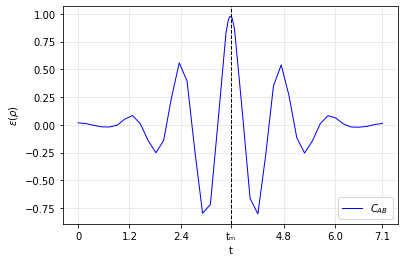

In [50]:
xt = [0, 1.2, 2.4, 3.57, 4.8, 6.0, 7.1]
xl = [0, 1.2, 2.4, 'tₘ', 4.8, 6.0, 7.1]

plt.plot(t, cBA, 'b-', lw = 1, label = r'$C_{AB}$')
# plt.plot(t, p24eff, 'c.', lw = 1, label = r'$H _{eff}$')
# plt.title(r'Corelação')
# plt.plot(t, ceff, 'r.')
# plt.plot(t, p4eff, 'b.')
plt.axvline(x=3.57, color = 'black', ls = '--', lw = 1)
plt.legend(loc = "lower right")
plt.grid(alpha=0.3)
plt.xlabel("t")
plt.ylabel(r'$\varepsilon(\rho)$')
plt.xticks(xt, xl)
plt.show()